# EV Market Segmentation in India


### Timeline of EV sales in India from 2004-2023

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df2 = pd.read_csv("dataset5/multiTimeline.csv", header=1)
df2[['Year', 'month']] = df2['Month'].str.split('-', expand=True)

In [9]:
data = df2.groupby("Year")["Electric vehicle: (India)"].sum()
data = data.rename("Electric vehicle (in lakh)").to_frame()
data["Electric vehicle (in lakh)"] = data["Electric vehicle (in lakh)"]*0.01

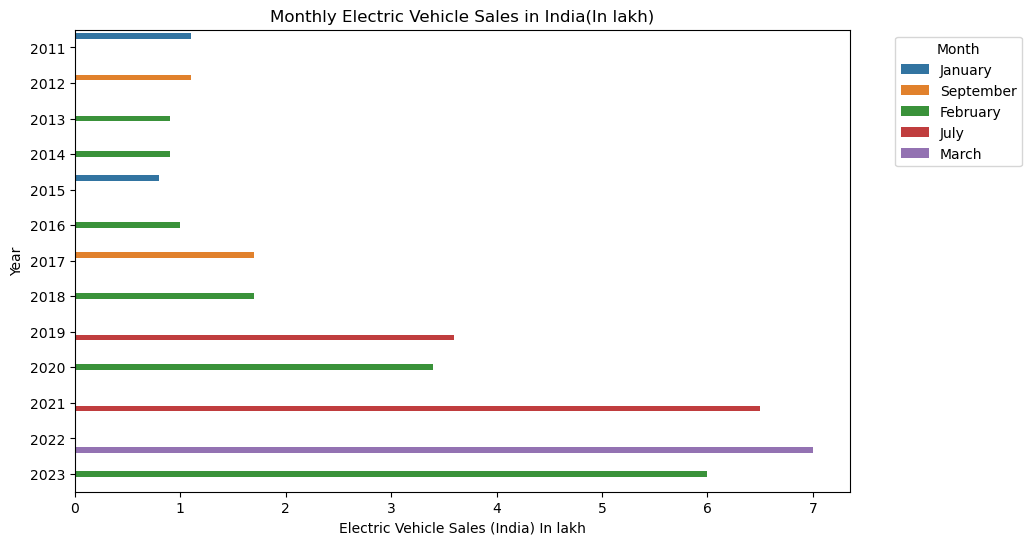

In [66]:
result = df2.groupby('Year').apply(lambda x: x.loc[x["Electric vehicle: (India)"].idxmax()])
month_wise = result[["month","Electric vehicle: (India)","Year"]]
month_wise = month_wise[month_wise.index > 2010]
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
month_wise["Electric vehicle: (India)"] = month_wise["Electric vehicle: (India)"]*0.1
month_wise = month_wise.astype(float)
month_wise.month = month_wise.month.replace(month_mapping)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=month_wise["Electric vehicle: (India)"], y=month_wise.index, hue=month_wise["month"], orient="horizontal")
plt.xlabel('Electric Vehicle Sales (India) In lakh')
plt.ylabel('Year')
plt.title('Monthly Electric Vehicle Sales in India(In lakh)')
# plt.gca().set_aspect('equal') 
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend

plt.show()

In [34]:
def calculate_cagr(b, e, n):
    cagr = ((e / b) ** (1 / n)) - 1
    cagr_percentage = cagr * 100
    return round(cagr_percentage,2)

In [35]:
calculate_cagr(data.loc["2016"][0], data.loc["2022"][0], 6)

40.13

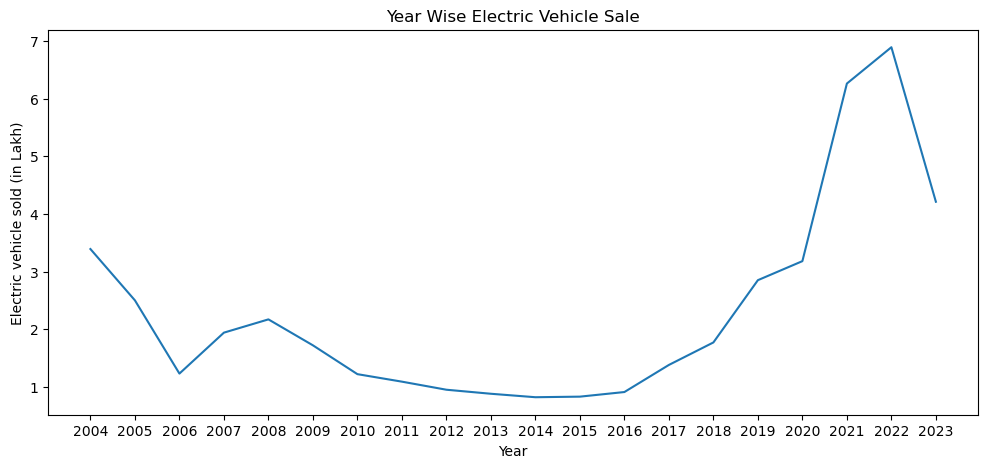

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(data)
plt.xlabel("Year")
plt.ylabel("Electric vehicle sold (in Lakh)")
plt.title("Year Wise Electric Vehicle Sale")
plt.show()

* EV sales growth was stangnant until 2016 after that it grows significantly with **40.3%** CAGR
* Maximum Sales can be observed in either January, February, March or July, September month.

## EV Charging Stations Sanctioned on Highways/ Expressways

In [67]:
df3 = pd.read_csv("dataset5/RS_Session_256_AU_2673_2.ii_.csv")
df3.drop(index=25, inplace=True)
df3.sort_values("EV Charging Stations Sanctioned", inplace=True, ascending=False)

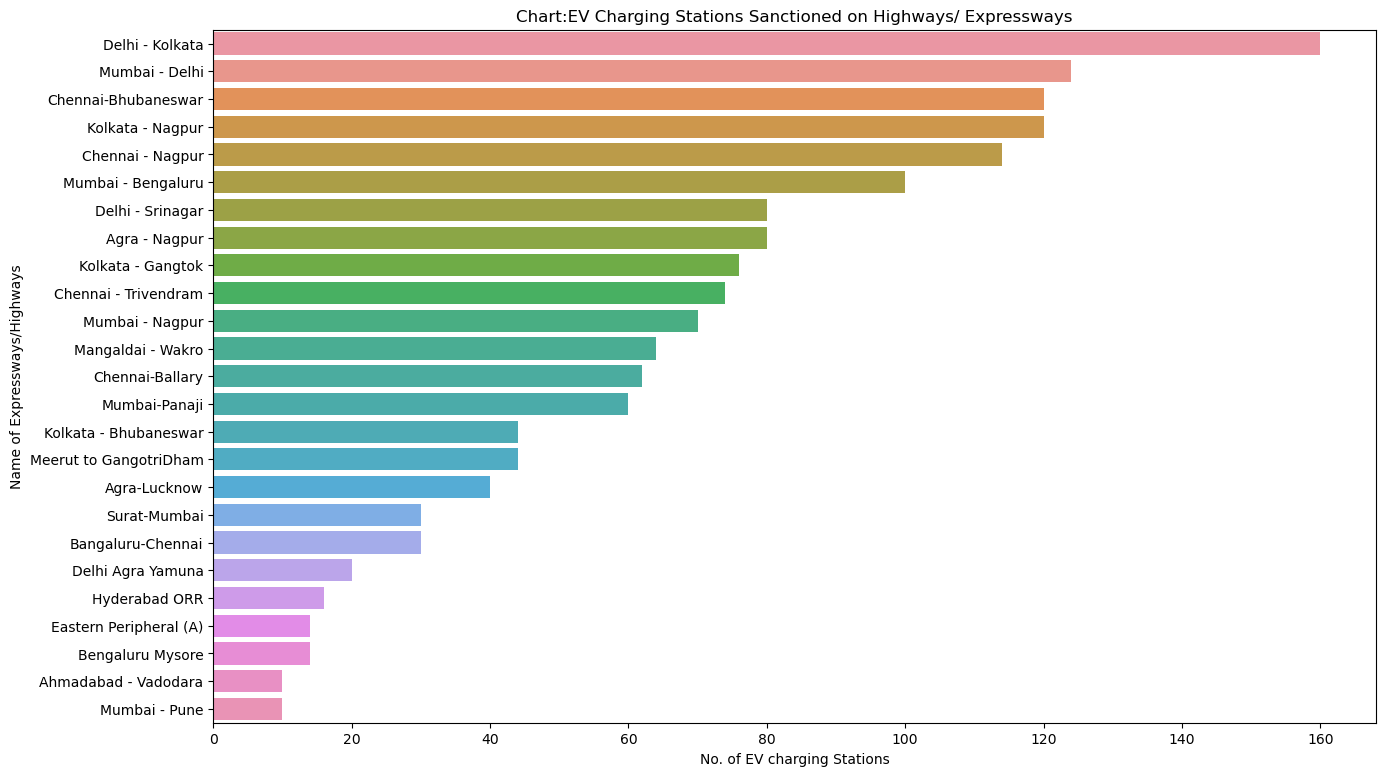

In [68]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(y=df3["Expressways/Highways"], x=df3["EV Charging Stations Sanctioned"],orient="horizontal")
plt.xlabel("No. of EV charging Stations")
plt.ylabel("Name of Expressways/Highways")
plt.title("Chart:EV Charging Stations Sanctioned on Highways/ Expressways")
plt.show()

* Maximum no. of charging stations are installed at Delhi-Kolkata i.e. Nearly 160.
* Chenni, kolkata, Nagpur, Delhi are top cities through which highway pass which has highest no. of charging station.

## Indian automoble buying behavour study

In [32]:
ds9 = pd.read_csv("dataset5/Indian automoble buying behavour study 1.0.csv")

In [33]:
ds9[ds9["Wife Working"] == "m"]
ds9.iat[11,7]= "No"
mapped_dict = {"Yes":1,"No":0,"Married":1,"Single":0,"Post Graduate":1,"Graduate":0,"Salaried":1, "Business":0}
ds9 = ds9.replace(mapped_dict)

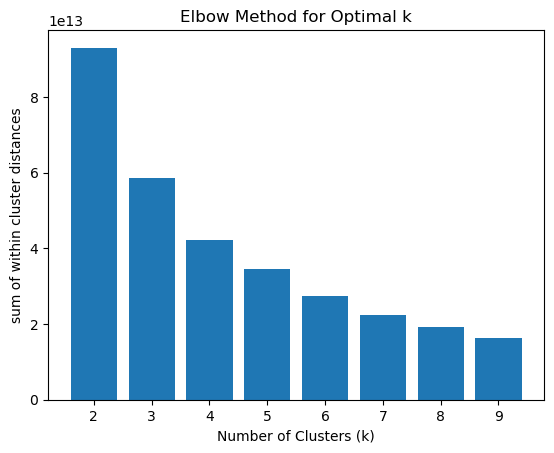

In [34]:
df1 = ds9.drop(columns="Make")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(df1)
    labels = model.predict(df1)
    silhouette_score_ = silhouette_score(df1, labels)
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

plt.bar(k_range, inertias)
plt.grid(False)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('sum of within cluster distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range) 
plt.show()

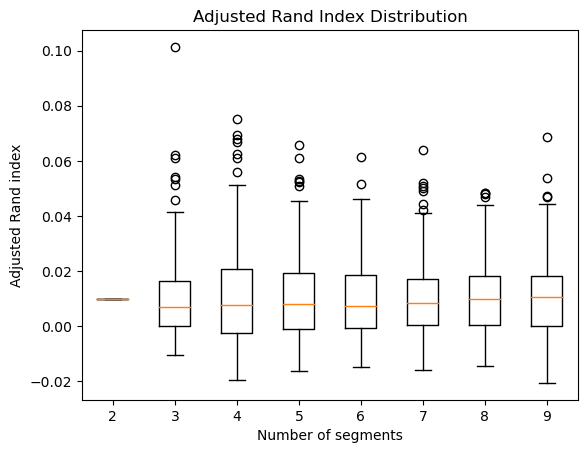

In [11]:
from sklearn.metrics import adjusted_rand_score
ARI_scores = []
for label in k_result:
    boot_n =200
    sample_size =len(label)
    ari_boot = []
    bootstrap_samples = []
    for i in range(200):
        # Draw random indices with replacement
        random_indices = np.random.choice(label, size=sample_size, replace=True)
        # Create a bootstrap sample using the drawn indices
        bootstrap_sample = [label[idx] for idx in random_indices]
        # Append the bootstrap sample to the list
        bootstrap_samples.append(bootstrap_sample)
        ari = adjusted_rand_score(label, bootstrap_sample)
        ari_boot.append(ari+0.01)
    ARI_scores.append(ari_boot)
plt.boxplot(ARI_scores, labels=range(2, 10))
plt.grid(False)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

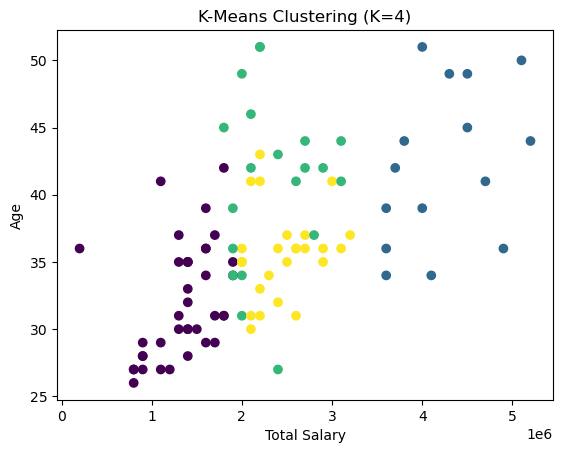

In [36]:
k4 = KMeans(n_clusters=4, n_init=10, random_state=42)
k4.fit(df1)
label = k4.predict(df1)
plt.scatter(x=df1["Total Salary"], y=df1["Age"], c=label, cmap="viridis")
plt.xlabel("Total Salary")
plt.ylabel("Age")
plt.title("K-Means Clustering (K=4)")
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

target = "Price"
X = ds9.drop(columns=[target, "Make","Salary","Wife Salary"])
y = ds9[target]


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_mean = [y.mean()] * len(y_test)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)

print("MAE:",mean_absolute_error(y_pred, y_test))
print("Baseline MAE:",mean_absolute_error(y_mean, y_test))
# print("MSE:",mean_squared_error(y_pred, y_test))

(20, 9)
(79, 9)
(20,)
(79,)
MAE: 228056.711630203
Baseline MAE: 360691.91919191915


In [1]:
import pickle
# with open('linear_model.pkl', 'wb') as file:
#     pickle.dump(model, file)
# file.close()

In [6]:
import sklearn

In [52]:
import pickle

def make_prediction(Age, 
                    profession,
                    Marrital_Status,
                    Education, 
                    No_of_Dependents, 
                    Personal_loan, 
                    House_Loan,
                    wife_working,
                    Total_Salary):
    predicted = {"Age":Age, 
    "Profession":profession,
    "Marrital Status":Marrital_Status,
    "Education":Education,
    "No of Dependents":No_of_Dependents,
    "Personal loan":Personal_loan,
    "House Loan":House_Loan,
    "Wife Working": wife_working,
    "Total Salary":Total_Salary}
    df= pd.DataFrame(predicted, index=[0])

    with open("linear_model.pkl", 'rb') as model_file:
        loaded_model = pickle.load(model_file)

    predicted_value = loaded_model.predict(df)[0]
    
    with open("ev_cars_clean.pkl", 'rb') as file:
        loaded_df = pickle.load(file)
    loaded_df["predicted"] = ([predicted_value]*len(loaded_df))
    loaded_df["error"] = (loaded_df["predicted"] - loaded_df["Car_price"]).abs()

    df = loaded_df.sort_values("error",ascending=True)

    return df.iloc[0:2,0]

In [7]:
sklearn.__version__

'1.3.0'

In [57]:
predicted = make_prediction(51,1,1,1,1,1,1,1,5000000)
predicted

3             MG ZS EV
7    Tata Nexon EV Max
Name: Car_name, dtype: object

In [8]:
predicted = {"Age":25, 
    "Profession":"Business",
    "Marrital Status":"Married",
    "Education":"Graduate",
    "No of Dependents":5,
    "Personal loan":"Yes",
    "House Loan":"Yes",
    "Wife Working": "Yes",
    "Total Salary":800000}

In [13]:
mapped_dict = {"Yes":1,"No":0,"Married":1,"Single":0,"Post Graduate":1,"Graduate":0,"Salaried":1, "Business":0}

# Iterate over the keys in the 'predicted' dictionary and replace "Yes" and "No"
for key, value in predicted.items():
    if value in mapped_dict:
        predicted[key] = mapped_dict[value]

In [14]:
predicted

{'Age': 25,
 'Profession': 0,
 'Marrital Status': 1,
 'Education': 0,
 'No of Dependents': 5,
 'Personal loan': 1,
 'House Loan': 1,
 'Wife Working': 1,
 'Total Salary': 800000}